# 1.Standard Scaling
 
 Standard scaling is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [2]:
df={
    'age':[25,32,47,51,62],
    'height_cm':[175,180,165,170,160],
    'weight_kg':[70,80,75,85,90]

}
# convert this data into a pandas dataframe
df=pd.DataFrame(df)
df.head()

,age,height_cm,weight_kg
0,25,175,70
1,32,180,80
2,47,165,75
3,51,170,85
4,62,160,90


In [3]:
# import the scalar
scalar = StandardScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height_cm,weight_kg
0,-1.382872,0.707107,-1.414214
1,-0.856780,1.414214,0.000000
2,0.270562,-0.707107,-0.707107
3,0.571186,0.000000,0.707107
4,1.397904,-1.414214,1.414214


## Min-Max Scalar

In [4]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height_cm,weight_kg
0,0.000000,0.75,0.00
1,0.189189,1.00,0.50
2,0.594595,0.25,0.25
3,0.702703,0.50,0.75
4,1.000000,0.00,1.00


## Max Absolute Scaler

In [5]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height_cm,weight_kg
0,0.403226,0.972222,0.777778
1,0.516129,1.000000,0.888889
2,0.758065,0.916667,0.833333
3,0.822581,0.944444,0.944444
4,1.000000,0.888889,1.000000


## Robust Scaling

In [6]:
# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height_cm,weight_kg
0,-1.157895,0.5,-1.0
1,-0.789474,1.0,0.0
2,0.000000,-0.5,-0.5
3,0.210526,0.0,0.5
4,0.789474,-1.0,1.0


---
## Transformation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#generate non-normal data(exponential distribution)
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(data, columns=['value'])
df.head()

,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='value', ylabel='Count'>

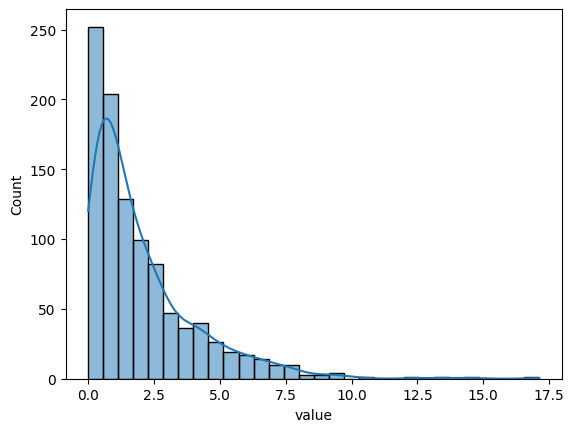

In [ ]:
# Histplot of above code(data) 
sns.histplot(df['value'], bins=30, kde=True)

In [13]:
col = df.columns[0]   # use the first numeric column


In [18]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

col = df.columns[0]

pt_boxcox = PowerTransformer(method='box-cox', standardize=True)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxcox k liay data must be positive
df['Box_Cox'] = pt_boxcox.fit_transform(df[[col]] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[[col]])
df['Quantile'] = qt_normal.fit_transform(df[[col]])


In [19]:
df.head()

,value,PowerTransformer(method='box-cox'),PowerTransformer(),Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.158969,0.179335,0.179335,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.677330,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.339698,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.167607,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.202107,-0.202107,-0.154930


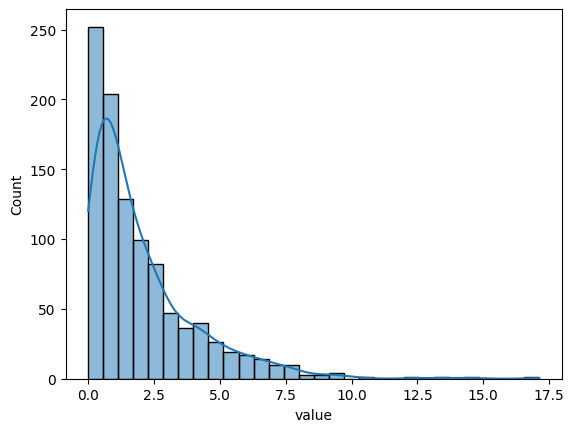

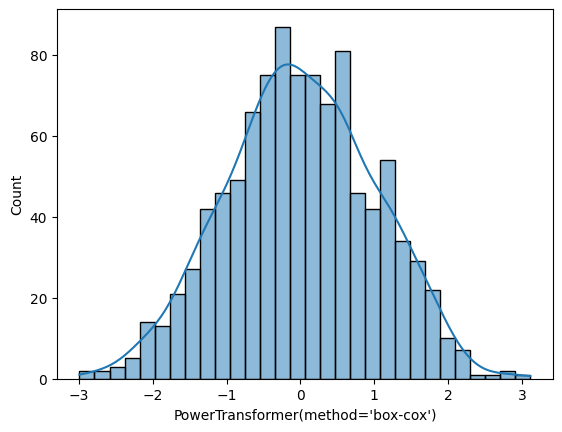

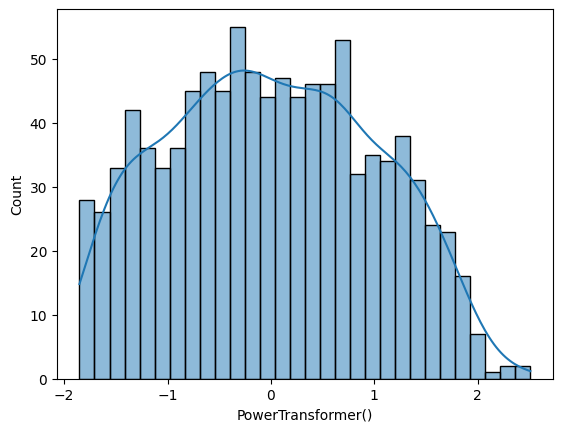

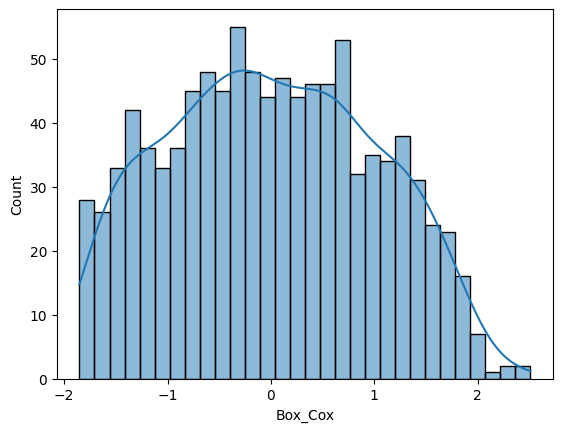

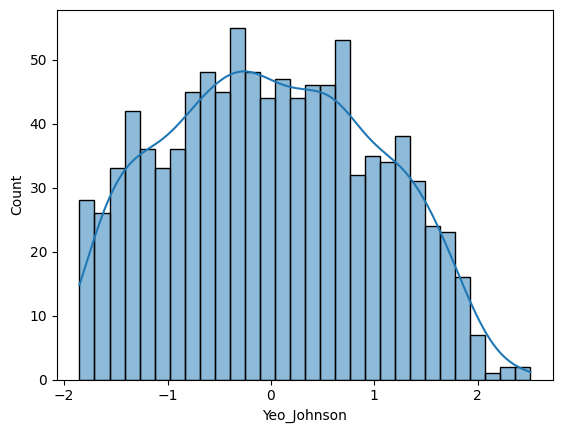

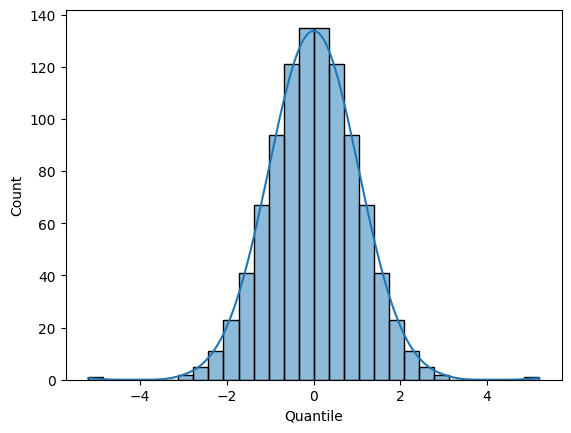

In [20]:
#create histogram for all columns usning sns.hist ans kde=true use a for loop
for column in df.columns:
    sns.histplot(df[column], bins=30, kde=True)
    plt.show()


## Normalization

L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [21]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## L1 Normalization:

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:

In [22]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-score normalization
    
     A.Standard Scalar

2. Min-Max normalization

    B.Min-Max Scalar

## Log Transformation

In [23]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [24]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


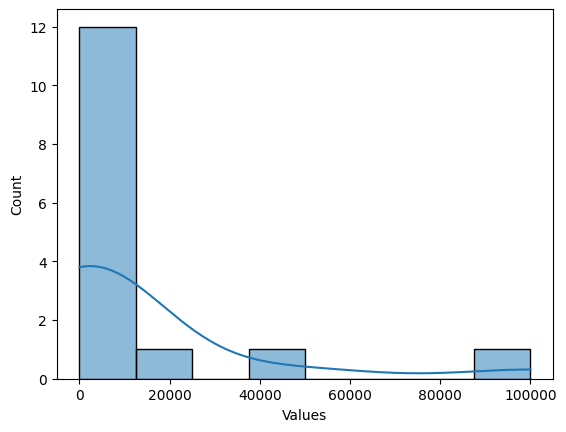

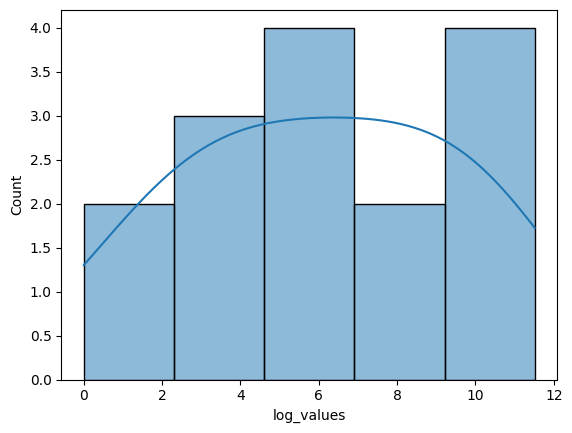

In [25]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()